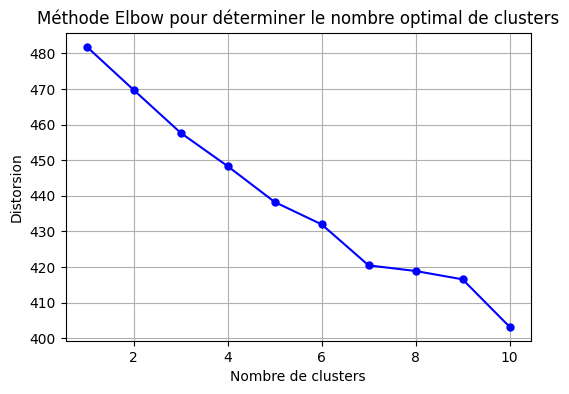

C:\Users\hp\AppData\Local\Temp\ipykernel_19360\2208381852.py:61: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', n_clusters)


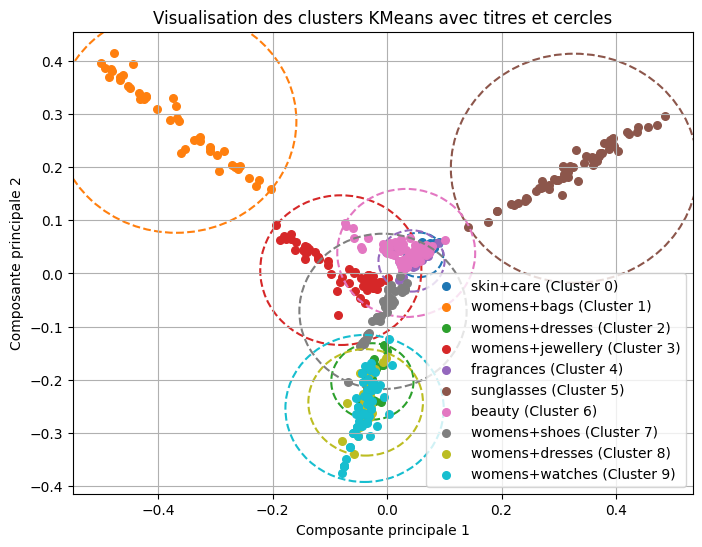

Recommandations : [{'id': 421, 'title': "Skechers Women's Summits", 'category': 'womens+shoes', 'price': 40.0, 'rating': 4.5, 'description': 'skechers womens summits sneaker', 'image': 'https://m.media-amazon.com/images/I/61mgslY9j7L._AC_UL320_.jpg'}, {'id': 423, 'title': "Asgard Women's Suede", 'category': 'womens+shoes', 'price': 34.99, 'rating': 4.3, 'description': 'asgard womens suede clogs leather mules arch support potato shoes comfort cork footbed wide feet please half size', 'image': 'https://m.media-amazon.com/images/I/81GhV0ukA3L._AC_UL320_.jpg'}, {'id': 424, 'title': 'Profoot Orthotic Insoles', 'category': 'womens+shoes', 'price': 8.49, 'rating': 4.3, 'description': 'profoot orthotic insoles plantar fasciitis heel pain womens pair', 'image': 'https://m.media-amazon.com/images/I/71-foaPtMgL._AC_UL320_.jpg'}]


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans , DBSCAN
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from collections import Counter

# Charger les données depuis le fichier JSON
products = pd.read_json('C:\\Users\\hp\\Desktop\\smartfashionistawebsite\\back-end\\myenv\\ecommerce\\ecomApp\\products.json')

# Assurer que les colonnes nécessaires existent et préparer les données
if 'description' in products.columns and 'category' in products.columns:
    products['combined'] = products['category'] + ' ' + products['description']
    vectorizer = TfidfVectorizer(
        stop_words='english',
        ngram_range=(1, 2),
        max_df=0.95,
        min_df=2
    )
    X = vectorizer.fit_transform(products['combined'])

    # Déterminer le nombre optimal de clusters avec la méthode Elbow
    distortions = []
    K = range(1, 11)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        distortions.append(kmeans.inertia_)

    # Dessiner le graphe Elbow
    plt.figure(figsize=(6, 4))
    plt.plot(K, distortions, 'bo-', markersize=5)
    plt.xlabel('Nombre de clusters')
    plt.ylabel('Distorsion')
    plt.title('Méthode Elbow pour déterminer le nombre optimal de clusters')
    plt.grid()
    plt.show()

    # Clustering avec le nombre de clusters choisi
    n_clusters = 10
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    products['cluster'] = kmeans.labels_

    # Associer un titre à chaque cluster basé sur la catégorie majoritaire
    cluster_titles = {}
    for cluster in range(n_clusters):
        cluster_categories = products[products['cluster'] == cluster]['category']
        most_common_category = Counter(cluster_categories).most_common(1)
        cluster_titles[cluster] = most_common_category[0][0] if most_common_category else f'Cluster {cluster}'

    # Réduction de dimension pour la visualisation des clusters
    pca = PCA(n_components=2)
    X_reduced = pca.fit_transform(X.toarray())

    # Dessiner les clusters avec titres et cercles
    plt.figure(figsize=(8, 6))
    colors = plt.cm.get_cmap('tab10', n_clusters)

    for cluster in range(n_clusters):
        cluster_points = X_reduced[products['cluster'] == cluster]
        plt.scatter(
            cluster_points[:, 0],
            cluster_points[:, 1],
            label=f'{cluster_titles[cluster]} (Cluster {cluster})',
            color=colors(cluster),
            s=30
        )
        # Ajouter un cercle autour des clusters
        center_x, center_y = cluster_points[:, 0].mean(), cluster_points[:, 1].mean()
        radius = np.sqrt(((cluster_points - [center_x, center_y]) ** 2).sum(axis=1).max())
        circle = plt.Circle((center_x, center_y), radius, color=colors(cluster), fill=False, linestyle='--', linewidth=1.5)
        plt.gca().add_artist(circle)

    plt.title('Visualisation des clusters KMeans avec titres et cercles')
    plt.xlabel('Composante principale 1')
    plt.ylabel('Composante principale 2')
    plt.legend()
    plt.grid()
    plt.show()

# Fonction pour recommander des produits
def recommend_products(search_words):
    if not search_words:
        raise ValueError("Query parameter is missing")

    # Transformer les mots de recherche en un vecteur TF-IDF
    search_vector = vectorizer.transform([search_words])

    # Calculer la similarité avec les centroïdes des clusters
    cluster_centroids = kmeans.cluster_centers_
    similarities = cosine_similarity(search_vector, cluster_centroids)
    most_similar_cluster = np.argmax(similarities)

    # Extraire les 3 produits les plus pertinents du cluster correspondant
    recommended_products = products[products['cluster'] == most_similar_cluster].head(3)
    recommended_list = recommended_products[['id', 'title', 'category', 'price', 'rating', 'description', 'image']].to_dict(orient='records')

    return recommended_list

# Exemple d'utilisation
if __name__ == "__main__":
    query = "sports shoes"
    recommendations = recommend_products(query)
    print("Recommandations :", recommendations)


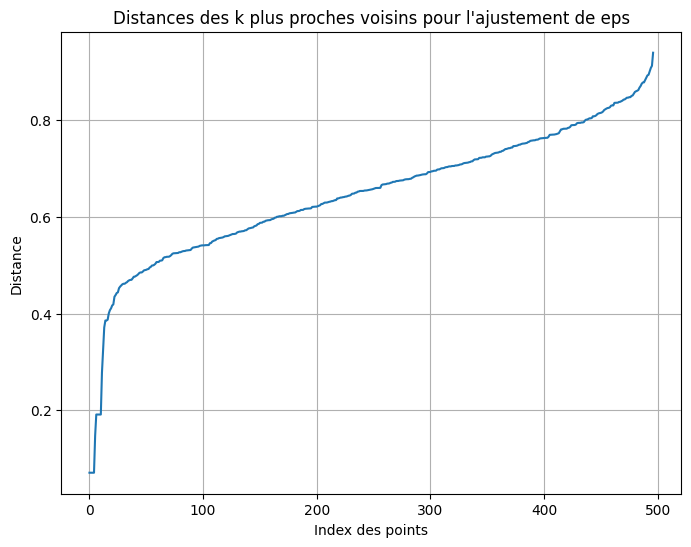

C:\Users\hp\AppData\Local\Temp\ipykernel_19360\1455006534.py:68: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_labels))  # Couleurs distinctes pour chaque cluster


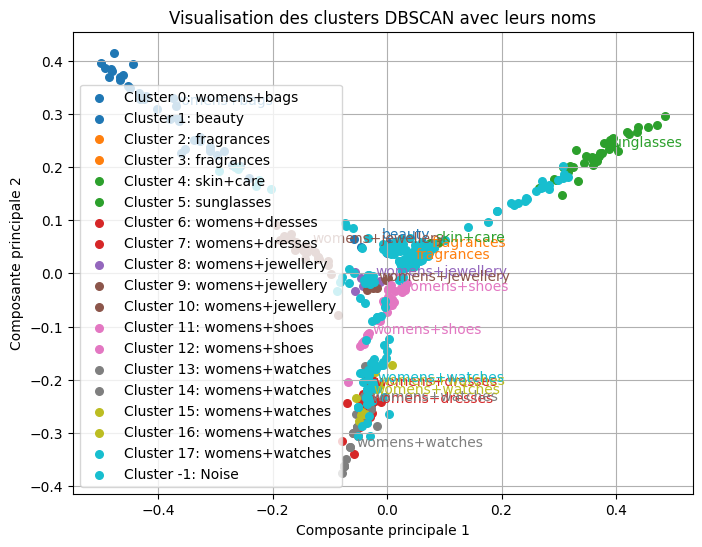

Recommandations : [{'id': 264, 'title': 'HUK, Polarized Lens', 'category': 'sunglasses', 'price': 46.18, 'rating': 4.5, 'description': 'huk polarized lens eyewear performance frames fishing sports outdoors sunglasses', 'image': 'https://m.media-amazon.com/images/I/51MCr66u+wL._AC_UL320_.jpg', 'cluster_name': 'Noise'}, {'id': 513, 'title': "Skechers Women's Rosencrans", 'category': 'womens+watches', 'price': 21.0, 'rating': 4.5, 'description': 'skechers womens rosencrans mid quartz plastic silicone casual sports watch', 'image': 'https://m.media-amazon.com/images/I/61XCMYd04GL._AC_UL320_.jpg', 'cluster_name': 'Noise'}, {'id': 449, 'title': 'AOV Women Arch', 'category': 'womens+shoes', 'price': 56.99, 'rating': 3.9, 'description': 'aov women arch support walking shoes orthotic sneakers plantar fasciitis foot heel pain relief tennis shoes size', 'image': 'https://m.media-amazon.com/images/I/71youkjVH+L._AC_UL320_.jpg', 'cluster_name': 'womens+shoes'}]


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from collections import Counter

# Charger les données depuis le fichier JSON
products = pd.read_json('C:\\Users\\hp\\Desktop\\smartfashionistawebsite\\back-end\\myenv\\ecommerce\\ecomApp\\products.json')

# Assurer que les colonnes nécessaires existent et préparer les données
if 'description' in products.columns and 'category' in products.columns:
    products['combined'] = products['category'] + ' ' + products['description']
    vectorizer = TfidfVectorizer(
        stop_words='english',
        ngram_range=(1, 2),
        max_df=0.95,
        min_df=2
    )
    X = vectorizer.fit_transform(products['combined'])

    # Visualisation des distances des k plus proches voisins pour déterminer 'eps'
    neighbors = NearestNeighbors(n_neighbors=5, metric='cosine')
    neighbors.fit(X)
    distances, _ = neighbors.kneighbors(X.toarray())

    # Tracer la courbe pour choisir le bon eps
    plt.figure(figsize=(8, 6))
    plt.plot(np.sort(distances[:, -1]), label="Distance des k plus proches voisins")
    plt.xlabel('Index des points')
    plt.ylabel('Distance')
    plt.title('Distances des k plus proches voisins pour l\'ajustement de eps')
    plt.grid()
    plt.show()

    # Ajuster l'eps et min_samples après l'observation des distances
    eps = 0.6  # Ajustez ce paramètre en fonction de l'analyse
    min_samples = 5  # Gardez une valeur raisonnable pour min_samples
    dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='cosine')
    dbscan_labels = dbscan.fit_predict(X)

    # Ajouter les labels des clusters DBSCAN au dataframe
    products['cluster'] = dbscan_labels

    # Nommer les clusters en fonction de la catégorie la plus fréquente dans chaque cluster
    cluster_names = {}

    for cluster in set(dbscan_labels):
        if cluster != -1:  # Ignorer les points de bruit (-1)
            cluster_products = products[products['cluster'] == cluster]
            # Compter les catégories les plus fréquentes dans le cluster
            category_counts = Counter(cluster_products['category'])
            most_common_category = category_counts.most_common(1)[0][0]
            cluster_names[cluster] = most_common_category

    # Ajouter un nom de cluster basé sur la catégorie dominante
    products['cluster_name'] = products['cluster'].map(cluster_names).fillna('Noise')

    # Visualiser les clusters avec PCA
    pca = PCA(n_components=2)
    X_reduced = pca.fit_transform(X.toarray())

    plt.figure(figsize=(8, 6))
    unique_labels = set(dbscan_labels)
    colors = plt.cm.get_cmap('tab10', len(unique_labels))  # Couleurs distinctes pour chaque cluster
    
    for i, label in enumerate(unique_labels):
        label_points = X_reduced[dbscan_labels == label]
        color = colors(i)
        
        # Afficher les points du cluster
        plt.scatter(label_points[:, 0], label_points[:, 1], label=f'Cluster {label}: {cluster_names.get(label, "Noise")}', color=color, s=30)
        
        # Afficher les annotations (noms de clusters)
        if label != -1:  # Ne pas annoter le bruit (-1)
            plt.annotate(cluster_names.get(label, 'Noise'),
                         xy=(label_points[:, 0].mean(), label_points[:, 1].mean()),
                         xytext=(5, 5), textcoords='offset points',
                         fontsize=10, color=color)

    plt.title('Visualisation des clusters DBSCAN avec leurs noms')
    plt.xlabel('Composante principale 1')
    plt.ylabel('Composante principale 2')
    plt.legend()
    plt.grid()
    plt.show()

# Fonction pour recommander des produits
def recommend_products(search_words):
    if not search_words:
        raise ValueError("Query parameter is missing")

    # Transformer les mots de recherche en un vecteur TF-IDF
    search_vector = vectorizer.transform([search_words])

    # Calculer la similarité avec les points des clusters
    similarities = cosine_similarity(search_vector, X)
    closest_indices = np.argsort(similarities[0])[-3:][::-1]  # Obtenir les indices des 3 produits les plus similaires

    # Extraire les produits recommandés
    recommended_products = products.iloc[closest_indices]
    recommended_list = recommended_products[['id', 'title', 'category', 'price', 'rating', 'description', 'image', 'cluster_name']].to_dict(orient='records')

    return recommended_list

# Exemple d'utilisation
if __name__ == "__main__":
    query = "sports shoes"
    recommendations = recommend_products(query)
    print("Recommandations :", recommendations)
